In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'C:\Users\ELCOT\Desktop\heart.csv')

In [4]:
data.shape

(731, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,59.116279,0.677155,0.893297,134.526676,252.088919,0.181943,0.492476,144.444596,0.376197,1.232148,1.329685,0.887825,2.359781,0.447332
std,5.659652,0.467884,1.054460,18.459145,53.117281,0.386061,0.539798,22.378883,0.484762,1.208086,0.614378,1.010087,0.656242,0.497559
min,50.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,120.000000,216.000000,0.000000,0.000000,130.000000,0.000000,0.100000,1.000000,0.000000,2.000000,0.000000
50%,58.000000,1.000000,0.000000,132.000000,245.000000,0.000000,0.000000,147.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,63.000000,1.000000,2.000000,145.000000,283.000000,0.000000,1.000000,161.000000,1.000000,1.900000,2.000000,2.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


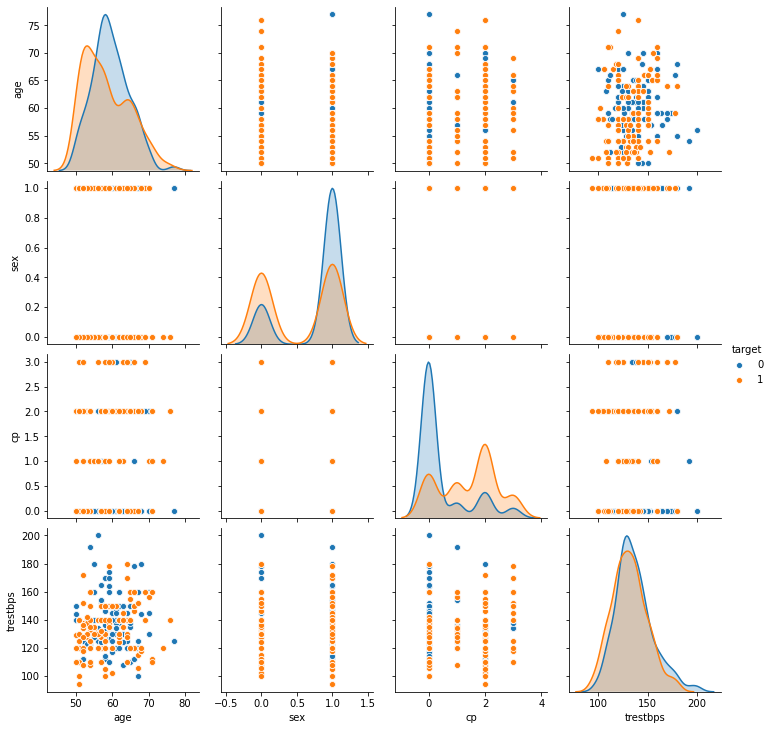

In [7]:
sns.pairplot(data=data[['age','sex','cp','trestbps','target']],hue='target')

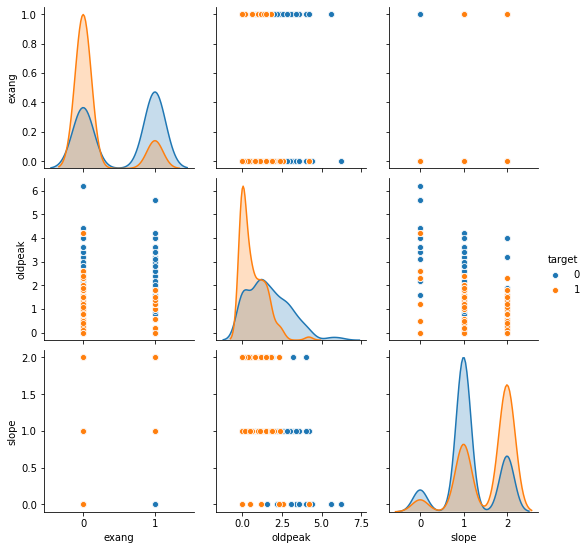

In [8]:
sns.pairplot(data=data[['exang','oldpeak','slope','target']],hue='target')

In [9]:
train = data.drop('target',axis = 1)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [10]:
target = data.target
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size = 0.3,random_state = 109)

In [12]:
print("X_train_size ==>",x_train.shape)
print("Y_train_size ==>",y_train.shape)
print("X_test_size ==>",x_test.shape)
print("Y_test_size ==>",y_test.shape)

X_train_size ==> (511, 13)
Y_train_size ==> (511,)
X_test_size ==> (220, 13)
Y_test_size ==> (220,)


In [13]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [14]:
print("ACCURACY :",metrics.accuracy_score(y_test,y_pred))

ACCURACY : 0.7909090909090909


In [15]:
print("PRECISION :",metrics.precision_score(y_test,y_pred))

PRECISION : 0.6964285714285714


In [16]:
print("RECALL :",metrics.recall_score(y_test,y_pred))

RECALL : 0.8666666666666667


In [18]:
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size=0.30,random_state=10)

In [19]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values = 0,strategy='mean',verbose=0)
x_train = fill_values.fit_transform(x_train)
x_test = fill_values.fit_transform(x_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest_mode1 = RandomForestClassifier(random_state=10)

random_forest_mode1.fit(x_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [21]:
predict_train_data = random_forest_mode1.predict(x_test)

from sklearn import metrics

print("Accuracy: {0}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy: 0.9863636363636363


In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train,y_train.ravel())

y_pred = gnb.predict(x_test)

In [23]:
from sklearn import metrics

print("ACCURACY : {0}".format(metrics.accuracy_score(y_test,y_pred)))

ACCURACY : 0.7772727272727272


In [24]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier = classifier.fit(x_train,y_train)

In [25]:
y_pred = classifier.predict(x_test)
print("ACCURACY : {0}".format(metrics.accuracy_score(y_test,y_pred)))

ACCURACY : 0.9727272727272728
